In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
data = pd.read_excel('toyota_km4.xlsx',na_values=['??']) #read from dataset

data.head() # view first few rows of the data

,x,r
0,46986.0,13500
1,72937.0,13750
2,41711.0,13950
3,48000.0,14950
4,38500.0,13750


In [198]:
data = data.dropna()

In [199]:
test_data = data.iloc[-100:]
test_data

,x,r
1331,65006.0,6950
1332,64280.0,8495
1333,64000.0,10000
1334,64000.0,6999
1335,64000.0,8950
...,...,...
1429,24000.0,8950
1430,23000.0,8450
1431,20544.0,7500
1433,17016.0,8500


In [200]:
data = data[:-100]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1330
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1321 non-null   float64
 1   r       1321 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.0 KB


In [201]:
data

,x,r
0,46986.0,13500
1,72937.0,13750
2,41711.0,13950
3,48000.0,14950
4,38500.0,13750
...,...,...
1326,65950.0,7400
1327,65500.0,8950
1328,65307.0,6900
1329,65254.0,7750


In [202]:
size = data['x'].size

Text(0.5, 1.0, 'Scatter')

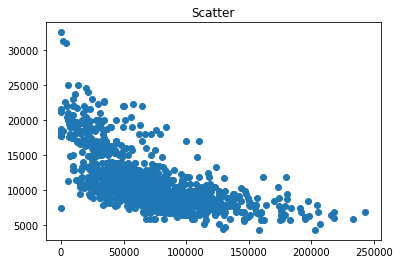

In [203]:
plt.scatter(data['x'],data['r'])
plt.title('Scatter')

In [204]:
data['x_sqr'] = data['x']**2
data

,x,r,x_sqr
0,46986.0,13500,2.207684e+09
1,72937.0,13750,5.319806e+09
2,41711.0,13950,1.739808e+09
3,48000.0,14950,2.304000e+09
4,38500.0,13750,1.482250e+09
...,...,...,...
1326,65950.0,7400,4.349402e+09
1327,65500.0,8950,4.290250e+09
1328,65307.0,6900,4.265004e+09
1329,65254.0,7750,4.258085e+09


In [205]:
data['r_sqr'] = data['r']**2
data

,x,r,x_sqr,r_sqr
0,46986.0,13500,2.207684e+09,182250000
1,72937.0,13750,5.319806e+09,189062500
2,41711.0,13950,1.739808e+09,194602500
3,48000.0,14950,2.304000e+09,223502500
4,38500.0,13750,1.482250e+09,189062500
...,...,...,...,...
1326,65950.0,7400,4.349402e+09,54760000
1327,65500.0,8950,4.290250e+09,80102500
1328,65307.0,6900,4.265004e+09,47610000
1329,65254.0,7750,4.258085e+09,60062500


In [206]:
data['xr'] = data['x']*data['r']

In [207]:
data

,x,r,x_sqr,r_sqr,xr
0,46986.0,13500,2.207684e+09,182250000,6.343110e+08
1,72937.0,13750,5.319806e+09,189062500,1.002884e+09
2,41711.0,13950,1.739808e+09,194602500,5.818684e+08
3,48000.0,14950,2.304000e+09,223502500,7.176000e+08
4,38500.0,13750,1.482250e+09,189062500,5.293750e+08
...,...,...,...,...,...
1326,65950.0,7400,4.349402e+09,54760000,4.880300e+08
1327,65500.0,8950,4.290250e+09,80102500,5.862250e+08
1328,65307.0,6900,4.265004e+09,47610000,4.506183e+08
1329,65254.0,7750,4.258085e+09,60062500,5.057185e+08


In [208]:
(sum(data['x_sqr'])-(sum(data['x'])**2/size))

1933293812752.7734

In [209]:
w1 = (sum(data['xr']) - sum(data['x'])*sum(data['r']/size)) / (sum(data['x_sqr'])-(sum(data['x'])**2/size))
w1

-0.05878823624952209

In [210]:
w0 = sum(data['r'])/size - w1*sum(data['x'])/size
w0

14998.874935686585

In [211]:
predicted = w0+w1*data['x']

In [212]:
predicted

0       12236.650867
1       10711.037348
2       12546.758813
3       12177.039596
4       12735.527840
            ...     
1326    11121.790755
1327    11148.245461
1328    11159.591591
1329    11162.707367
1330    11176.405027
Name: x, Length: 1321, dtype: float64

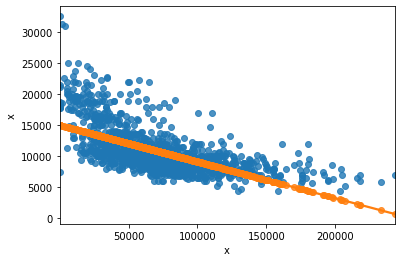

In [213]:

sns.regplot(x = 'x',y = 'r',data = data,fit_reg=False)#.set(xlim=(0,10),ylim=(0,10))

sns.regplot(x = 'x',y = predicted,data = data)


In [214]:
error = sum((data['r']-predicted)**2)/size

In [215]:
error

8215645.610687097

In [216]:
test_predicted = w0+w1*test_data['x']

In [217]:
test_size = data['x'].size

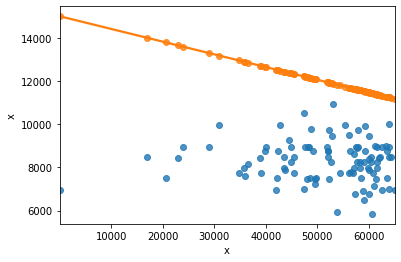

In [218]:

sns.regplot(x = 'x',y = 'r',data = test_data,fit_reg=False)#.set(xlim=(0,10),ylim=(0,10))

sns.regplot(x = 'x',y = test_predicted,data = test_data)


In [220]:
error = sum((test_data['r']-test_predicted)**2)/test_size
error

1125365.2363215038